# HR Data Analysis

---




In [72]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
#importing dataset
df = pd.read_csv("/content/3. hr_dashboard_data.csv")

In [7]:
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [74]:
# Printing concise summary of dataset including information about the index, columns, data types, memory usage, and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


Column 'Joining date' is of object type, we need to change its type to date time to ease the further analyses

In [75]:
# Changed the dtype from object to datetime
df['Joining Date'] = pd.to_datetime(df['Joining Date'], format ='%b-%y' )

In [76]:
# checking the change in column using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   200 non-null    object        
 1   Age                    200 non-null    int64         
 2   Gender                 200 non-null    object        
 3   Projects Completed     200 non-null    int64         
 4   Productivity (%)       200 non-null    int64         
 5   Satisfaction Rate (%)  200 non-null    int64         
 6   Feedback Score         200 non-null    float64       
 7   Department             200 non-null    object        
 8   Position               200 non-null    object        
 9   Joining Date           200 non-null    datetime64[ns]
 10  Salary                 200 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 17.3+ KB


In [77]:
# checking null or missing values in the dataset
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

<Axes: >

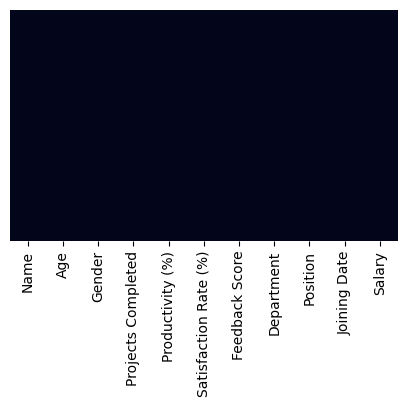

In [12]:
# showing null values using heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(), yticklabels= False, cbar= False)


No Missing Values found in the dataset

In [13]:
# FInding duplicated values
df[df.duplicated()]

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary


No Duplicate values found

#### Data Insights

In [14]:
# Number of employees in dataset
df['Name'].value_counts().sum()

200

We have 200 employees' Dataset

In [15]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133


In [16]:
# Average age of employess
df['Age'].mean().round()

35.0

35 is the average age of employess

<Axes: xlabel='Age', ylabel='Count'>

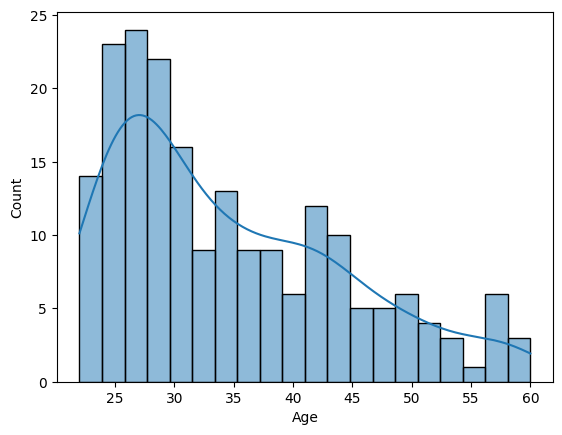

In [79]:
# plotting the Age distribution using histogram
sns.histplot(df['Age'], bins=20, kde=True)

In [80]:
# printing correlation between variables
df.corr(numeric_only=True)

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
Age,1.000000,0.758364,0.021193,0.035284,0.012014,0.834550
Projects Completed,0.758364,1.000000,0.061707,-0.010815,0.083170,0.874329
Productivity (%),0.021193,0.061707,1.000000,0.049897,-0.005948,0.025519
Satisfaction Rate (%),0.035284,-0.010815,0.049897,1.000000,0.008068,-0.018302
Feedback Score,0.012014,0.083170,-0.005948,0.008068,1.000000,0.034818
Salary,0.834550,0.874329,0.025519,-0.018302,0.034818,1.000000


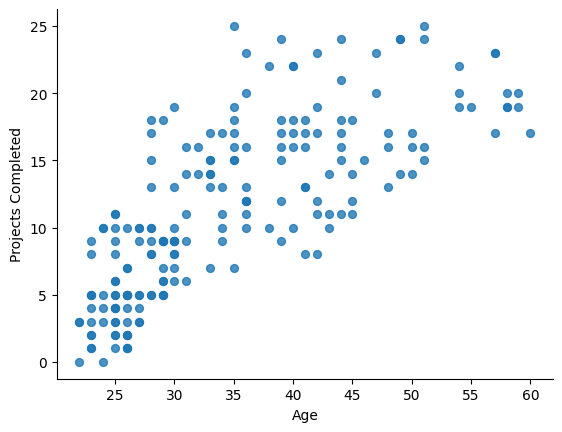

In [42]:
# @title Age vs Projects Completed


df.plot(kind='scatter', x='Age', y='Projects Completed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Correlation between Years of Experience and Salary?

Calculating new column : 'Experience in years'

In [21]:
# importing Datetime library
from datetime import datetime

In [22]:
#calulating today's date
today_date = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))
today_date

Timestamp('2024-04-16 00:00:00')

In [81]:
# Years of experience is calculated by subtracting date of joining from today's date
df['Years of Experience'] = (today_date - df['Joining Date']).dt.days // 365 # to convert days into years
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Years of Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,4
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,25
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,7
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,2
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,19
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,2019-01-01,50051,5
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,2021-01-01,46612,3
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,2021-01-01,32992,3
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,2005-01-01,104216,19


In [82]:
# correlation between Salary and years of experience
df['Salary'].corr(df['Years of Experience'])

0.7890826231131431

Text(0, 0.5, 'Salary')

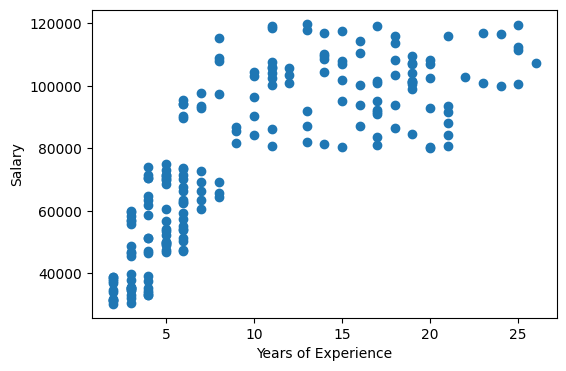

In [83]:
# Visualizing correlation using scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')


**There is a positive correlation between 'Years of Experience' and 'Salary', with a correlation coefficient of 0.79. This implies that as Years of Experience increases, we can anticipate a corresponding increase in employee Salary**

<Axes: >

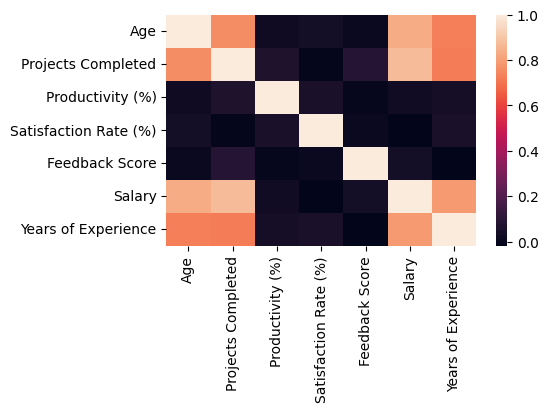

In [84]:
# Showing correlattion between all variables using heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True))

In [27]:
df.head(2)

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Years of Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,4
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,25


####  Average productivity score for each department

In [85]:
# calculating average score for each department using group by method

avg_prod_scores =df.groupby('Department')['Productivity (%)'].mean().round()
avg_prod_scores

Department
Finance      42.0
HR           48.0
IT           56.0
Marketing    44.0
Sales        44.0
Name: Productivity (%), dtype: float64

(20.0, 70.0)

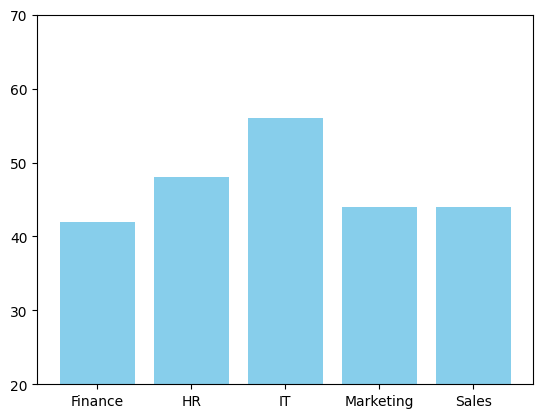

In [87]:
# plotting the averages on bargraph
plt.bar(avg_prod_scores.index, avg_prod_scores, color= 'skyblue')
plt.ylim(20,70) # limit the starting range for better representation


The IT department has achieved the highest Productivity scores, reaching 56%, followed by HR with 48%, Marketing and Sales with 44%, and Finance recording the lowest score at 42%.

#### Is there any relationship between productivity and satisfaction scores? Scatter plot.

Text(0, 0.5, 'Satisfaction Scores')

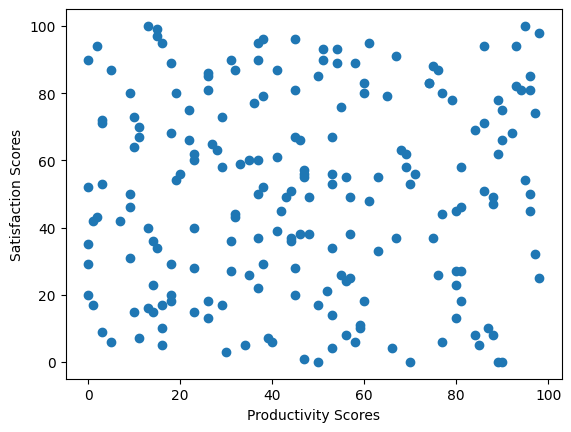

In [88]:
# correlation between Productivity and Satisfaction rate
plt.scatter(df['Productivity (%)'], df['Satisfaction Rate (%)'], )
plt.xlabel('Productivity Scores')
plt.ylabel('Satisfaction Scores')

In [31]:
df['Productivity (%)'].corr(df['Satisfaction Rate (%)'])

0.0498971195971882


The scatterplot above demonstrates that there is no discernible correlation between Productivity and Satisfaction scores, as evidenced by the spread of data points across the plot. This conclusion is further supported by the correlation coefficient of 0.49, which aligns with the absence of a strong linear relationship between the two variables.

In [32]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Years of Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,4
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,25
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,7
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,2
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,19


#### Distribution of Satisfaction scores

<Axes: xlabel='Satisfaction Rate (%)', ylabel='Density'>

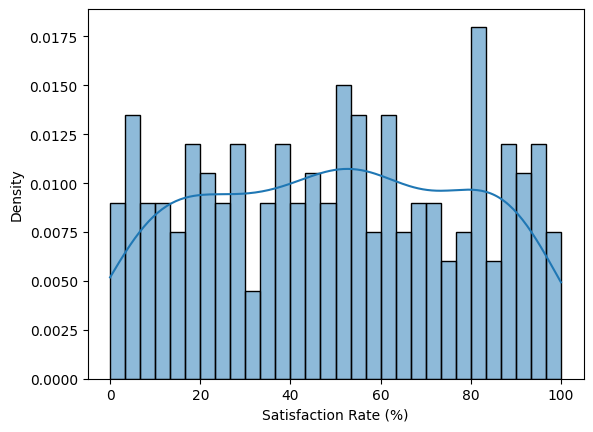

In [89]:
# Plotting distribution of satisfaction rate using histogram
sns.histplot(df['Satisfaction Rate (%)'], bins=30, kde=True, stat='density' )

#### Calculate the average salary for each age group

In [34]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Years of Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,4
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,25
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,7
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,2
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,19


In [35]:
df['Age'].min()

22

In [36]:
df['Age'].max()

60

In [37]:
# Distributing dataset in groups
Bins=[20, 30, 40, 50, 60, ]
labels=['20-30', '30-40', '40-50', '50-60', ]

df['Age Group'] = pd.cut(df['Age'], bins=Bins, labels=labels, )
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Years of Experience,Age Group
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,4,20-30
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,25,50-60
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,7,20-30
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,2,20-30
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,19,40-50


In [69]:
# Calculated the Average salary for each Age Group
avg_salary_byage= df.groupby('Age Group')['Salary'].mean().round()
avg_salary_byage

Age Group
20-30     53294.0
30-40     90650.0
40-50     99499.0
50-60    112360.0
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Average Salary of each Age Group')

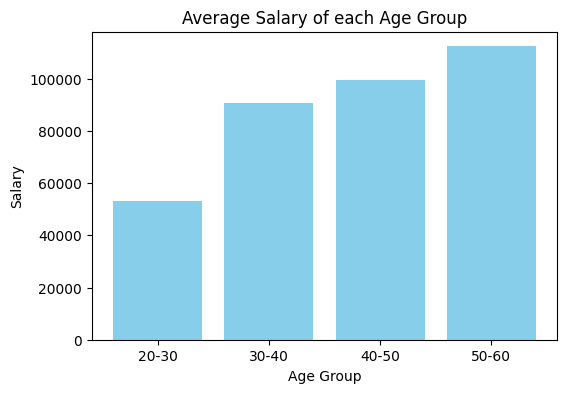

In [70]:
#Plotting the Average Salary based on Age Group
plt.figure(figsize=(6,4))
plt.bar(avg_salary_byage.index, avg_salary_byage, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Salary')
plt.title('Average Salary of each Age Group')

#### Outliers in dataset

In [91]:
# Statistics Summary of dataset
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Joining Date,Salary,Years of Experience
count,200.000000,200.000000,200.000000,200.000000,200.000000,200,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,2014-01-11 20:45:36,76619.245000,9.970000
min,22.000000,0.000000,0.000000,0.000000,1.000000,1998-01-01 00:00:00,30231.000000,2.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,2008-01-01 00:00:00,53080.500000,4.000000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,2017-01-01 00:00:00,80540.000000,7.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,2020-01-01 00:00:00,101108.250000,16.000000
max,60.000000,25.000000,98.000000,100.000000,4.900000,2022-01-01 00:00:00,119895.000000,26.000000
std,9.797318,6.408849,28.530068,28.934353,1.123263,NaN,27082.299202,6.701016


<Axes: xlabel='Productivity (%)', ylabel='Density'>

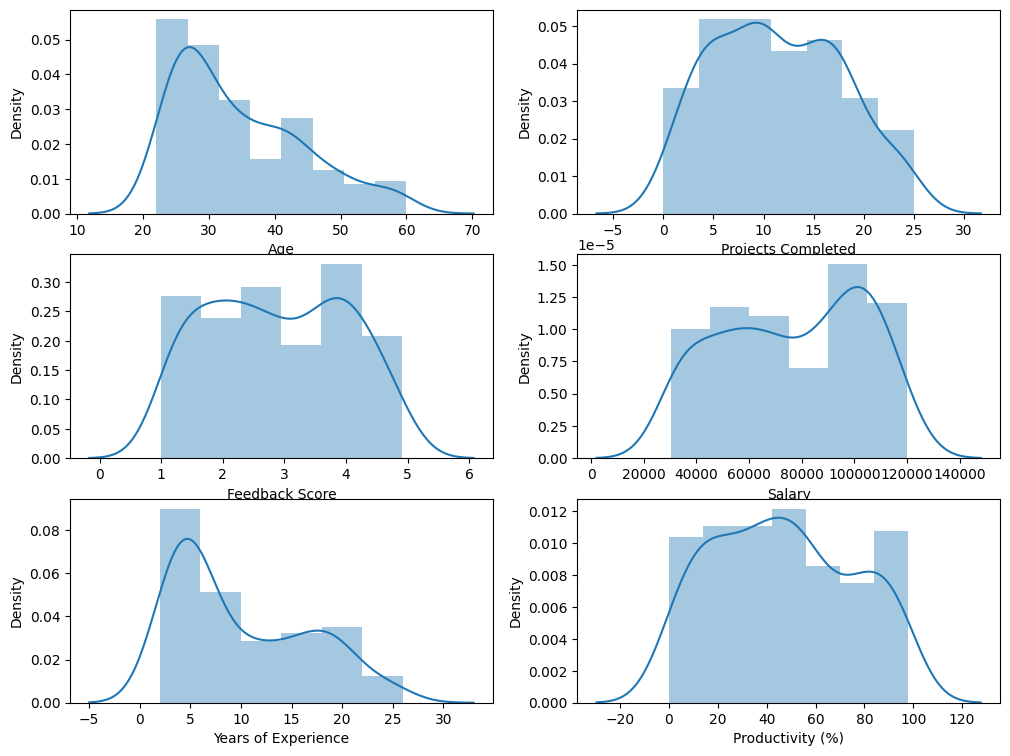

In [92]:
# Plot dist plot for the features to determine if distribution if right skewed or left skewed.
# It'll help us to detect outliers for a specific column

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize= (12,9),)
plt.subplot(3,2,1)
sns.distplot(df['Age'])
plt.subplot(3,2,2)
sns.distplot(df['Projects Completed'])
plt.xlabel('Projects Completed')
plt.subplot(3,2,3)
sns.distplot(df['Feedback Score'])
plt.subplot(3,2,4)
sns.distplot(df['Salary'])
plt.subplot(3,2,5)
sns.distplot(df['Years of Experience'])
plt.subplot(3,2,6)
sns.distplot(df['Productivity (%)'])



<Axes: xlabel='Age'>

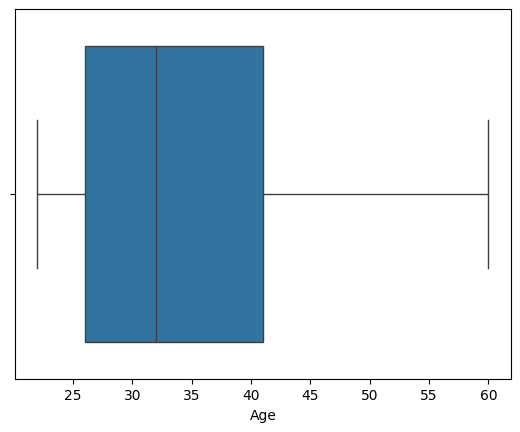

In [94]:
sns.boxplot(df['Age'], orient='h')

<Axes: xlabel='Years of Experience'>

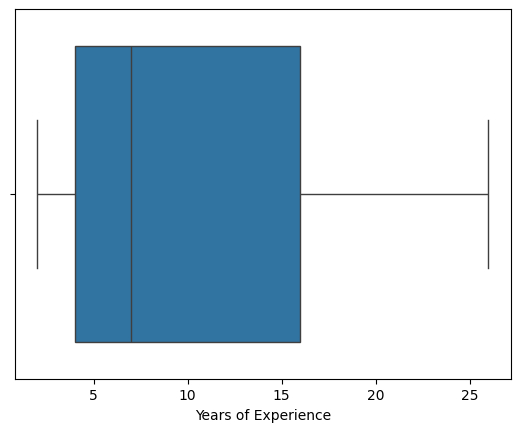

In [95]:
sns.boxplot(df['Years of Experience'], orient='h')


<Axes: xlabel='Productivity (%)'>

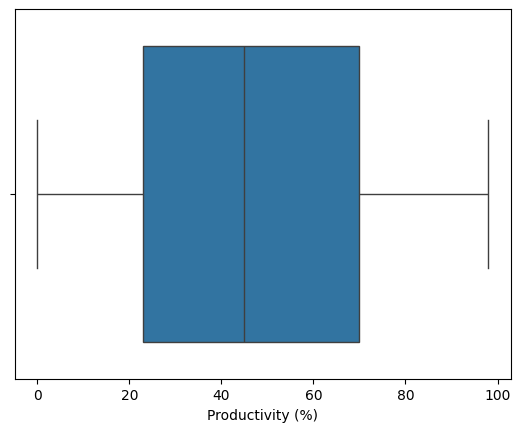

In [97]:
sns.boxplot(df['Productivity (%)'], orient='h')

**We utilized distplot and boxplot to assess the numerical columns for the presence of outliers within the dataset. Based on the generated graphs, it appears that none of the columns contain outliers.**


**Project Conclusion:**

The project aimed to analyze correlations between variables. Before analysing, applied data cleaning techniques to identify missing or null data, detect duplicated entries, and identify outliers within the dataset. Additionally, Conducted data manipulation by introducing additional columns to augment our insights and analysis.

**Insights:**


1.   No outliers were detected in the dataset.
2.   Age, Number of Projects completed, and Salary are correlated. However, no correlation was found between other variables, including Satisfaction scores and Feedback scores.
3. Age or Years of Experience are not significant contributing factors to employee satisfaction and productivity.
